In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#taking a look at the data
df=pd.read_json('https://data.montgomerycountymd.gov/resource/v76h-r7br.json')
print(df.head())

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0          

In [2]:
#fix the name of the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['year', 'month', 'supplier', 'item_code', 'item_description',
       'item_type', 'retail_sales', 'retail_transfers', 'warehouse_sales'],
      dtype='object')


In [3]:
#checking the shape of the dataset
print('Dataset shape: ', df.shape)

Dataset shape:  (307645, 9)


In [4]:
#let's take a look at the dataset summary statistics
print(df.describe())

                year          month   retail_sales  retail_transfers  \
count  307645.000000  307645.000000  307642.000000     307645.000000   
mean     2018.438525       6.423862       7.024071          6.936465   
std         1.083061       3.461812      30.986238         30.237195   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.267500          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       warehouse_sales  
count    307645.000000  
mean         25.294597  
std         249.916798  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000  


In [5]:
#taking a look at the dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              307645 non-null  int64  
 1   month             307645 non-null  int64  
 2   supplier          307478 non-null  object 
 3   item_code         307645 non-null  object 
 4   item_description  307645 non-null  object 
 5   item_type         307644 non-null  object 
 6   retail_sales      307642 non-null  float64
 7   retail_transfers  307645 non-null  float64
 8   warehouse_sales   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB
None


In [6]:
#do we have missing values
print(df.isnull().sum())

year                  0
month                 0
supplier            167
item_code             0
item_description      0
item_type             1
retail_sales          3
retail_transfers      0
warehouse_sales       0
dtype: int64


In [7]:
#let's deal with those missing values
df['supplier'] = df['supplier'].fillna('Unknown')
df[['item_type', 'retail_sales']] = df[['item_type', 'retail_sales']].dropna()
print(df.isnull().sum())

year                0
month               0
supplier            0
item_code           0
item_description    0
item_type           4
retail_sales        4
retail_transfers    0
warehouse_sales     0
dtype: int64


In [8]:
#checking for duplicates
print('Duplicated rows: ', df.duplicated().sum())

Duplicated rows:  0


In [9]:
#taking a look at the data types
print(df.dtypes)

year                  int64
month                 int64
supplier             object
item_code            object
item_description     object
item_type            object
retail_sales        float64
retail_transfers    float64
warehouse_sales     float64
dtype: object


In [10]:
#finding non-numeric values 
non_numeric_values = df[~df['item_code'].str.isdigit()]
print(non_numeric_values)

        year  month                           supplier item_code  \
11996   2020      1                            Unknown        BC   
11997   2020      1                            Unknown        WC   
23229   2020      7                            Unknown        BC   
23230   2020      7                            Unknown        WC   
34727   2020      3                            Unknown        BC   
34728   2020      3                            Unknown        WC   
48406   2017      6                           DOPS INC    97024A   
48539   2017      6                            Unknown        BC   
48540   2017      6                            Unknown        WC   
61563   2017      7                            Unknown        BC   
61564   2017      7                            Unknown        WC   
75162   2017      8                            Unknown        BC   
75163   2017      8                            Unknown        WC   
88586   2017      9                            U

In [11]:
#let's check for mixed types
for column in df.columns:
    print(f'{column}:{df[column].apply(lambda x:type(x)).value_counts()}')

year:year
<class 'int'>    307645
Name: count, dtype: int64
month:month
<class 'int'>    307645
Name: count, dtype: int64
supplier:supplier
<class 'str'>    307645
Name: count, dtype: int64
item_code:item_code
<class 'str'>    307645
Name: count, dtype: int64
item_description:item_description
<class 'str'>    307645
Name: count, dtype: int64
item_type:item_type
<class 'str'>      307641
<class 'float'>         4
Name: count, dtype: int64
retail_sales:retail_sales
<class 'float'>    307645
Name: count, dtype: int64
retail_transfers:retail_transfers
<class 'float'>    307645
Name: count, dtype: int64
warehouse_sales:warehouse_sales
<class 'float'>    307645
Name: count, dtype: int64


In [12]:
#checking the float values
float_values = df[df['item_type'].apply(lambda x:isinstance(x,float))]
print(float_values)

        year  month                           supplier item_code  \
18402   2020      7                            Unknown         4   
95775   2017     10  REPUBLIC NATIONAL DISTRIBUTING CO    347939   
297225  2020      9                            Unknown         3   
303261  2020      9                            Unknown         4   

                                item_description item_type  retail_sales  \
18402                                   RMS ITEM       NaN           NaN   
95775   FONTANAFREDDA BAROLO SILVER LABEL 750 ML       NaN           NaN   
297225                                    COUPON       NaN           NaN   
303261                                  RMS ITEM       NaN           NaN   

        retail_transfers  warehouse_sales  
18402                0.0              0.0  
95775                0.0              1.0  
297225               0.0              0.0  
303261               0.0              0.0  


In [13]:
#droping the NaN values
df = df.dropna(subset=['item_type'])
                       
#let's check for mixed types
for column in df.columns:
    print(f'{column}:{df[column].apply(lambda x:type(x)).value_counts()}')

year:year
<class 'int'>    307641
Name: count, dtype: int64
month:month
<class 'int'>    307641
Name: count, dtype: int64
supplier:supplier
<class 'str'>    307641
Name: count, dtype: int64
item_code:item_code
<class 'str'>    307641
Name: count, dtype: int64
item_description:item_description
<class 'str'>    307641
Name: count, dtype: int64
item_type:item_type
<class 'str'>    307641
Name: count, dtype: int64
retail_sales:retail_sales
<class 'float'>    307641
Name: count, dtype: int64
retail_transfers:retail_transfers
<class 'float'>    307641
Name: count, dtype: int64
warehouse_sales:warehouse_sales
<class 'float'>    307641
Name: count, dtype: int64


In [14]:
#checking again for missing data:
print(df.isna().sum())

year                0
month               0
supplier            0
item_code           0
item_description    0
item_type           0
retail_sales        0
retail_transfers    0
warehouse_sales     0
dtype: int64


In [15]:
#let's change the data type of the item_type column
df['item_type'] = df['item_type'].astype(str)

In [16]:
#overview of the clean data first few rows
print(df.head())

   year  month                           supplier item_code  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      item_description item_type  retail_sales  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   retail_transfers  warehouse_sales  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0          

In [17]:
#summary stats
print(df.describe())

                year          month   retail_sales  retail_transfers  \
count  307641.000000  307641.000000  307641.000000     307641.000000   
mean     2018.438514       6.423832       7.024094          6.936555   
std         1.083053       3.461822      30.986286         30.237382   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.270000          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       warehouse_sales  
count    307641.000000  
mean         25.294923  
std         249.918407  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000  


In [18]:
#checking the columns data type
print(df.dtypes)

year                  int64
month                 int64
supplier             object
item_code            object
item_description     object
item_type            object
retail_sales        float64
retail_transfers    float64
warehouse_sales     float64
dtype: object


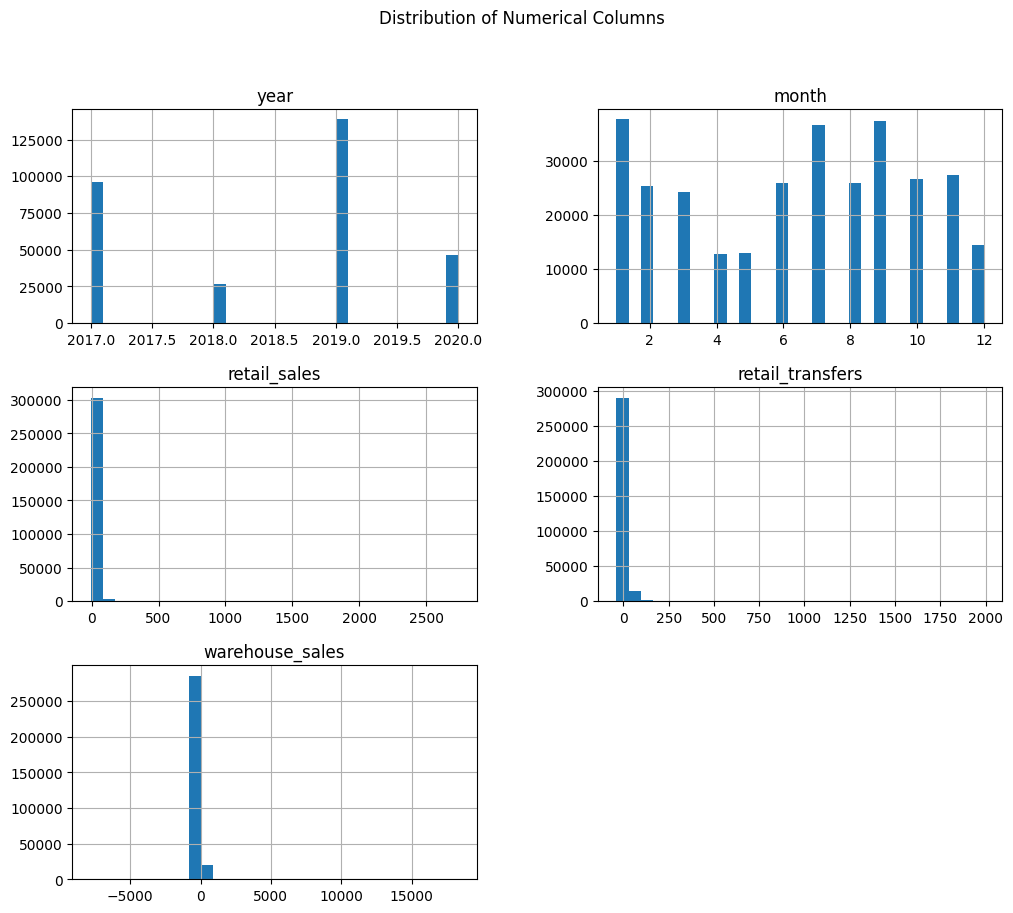

In [19]:
#visualizing numerical distributions
df.hist(figsize=(12,10), bins=30)
plt.suptitle('Distribution of Numerical Columns')
plt.show()

In [21]:
#grouping data
retail_sales_by_product = df.groupby('item_type')['retail_sales'].sum().reset_index()

In [22]:
#sorting data
retail_sales_by_product = retail_sales_by_product.sort_values(by='retail_sales', ascending=False)

In [23]:
#Top Product Types
top_products = retail_sales_by_product.sort_values(by='retail_sales', ascending=False).head(10)
print(top_products)

      item_type  retail_sales
3        LIQUOR     802691.43
7          WINE     746498.59
0          BEER     574220.53
4   NON-ALCOHOL      34084.31
6  STR_SUPPLIES       2740.88
5           REF        663.63
2          KEGS          0.00
1       DUNNAGE          0.00


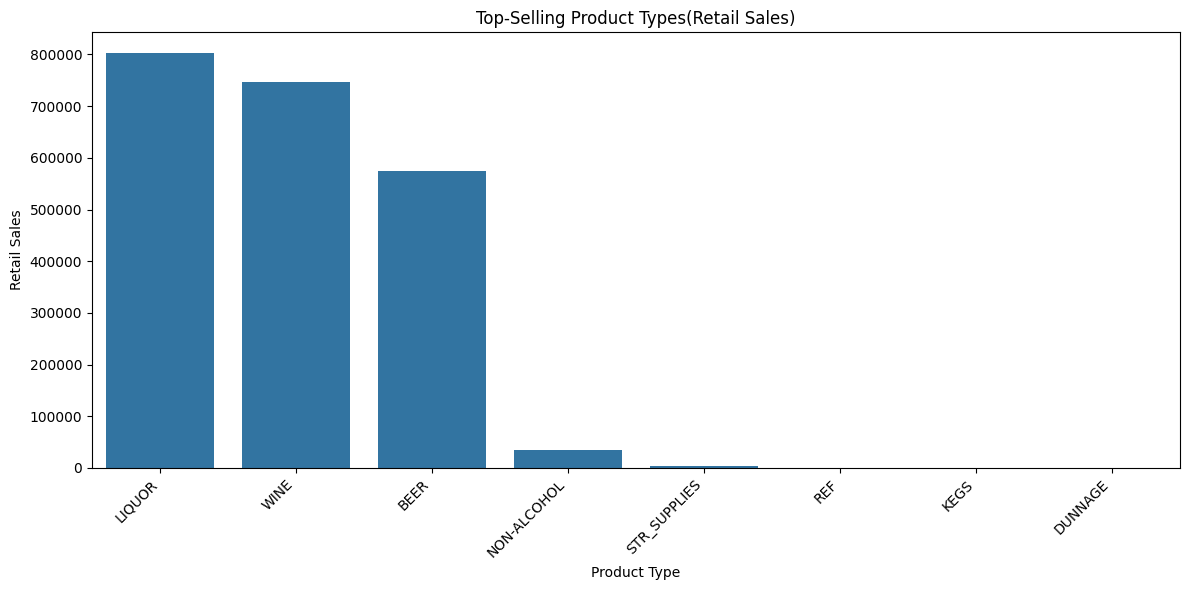

In [24]:
#Visualizing Top-Selling Products
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='item_type', y='retail_sales')
plt.title('Top-Selling Product Types(Retail Sales)')
plt.xlabel('Product Type')
plt.ylabel('Retail Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
#Creating the date column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
print(df.date.head())

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: date, dtype: datetime64[ns]


In [26]:
#Dropping the year and month columns
df = df.drop(columns=['year','month'])
print(df.columns)

Index(['supplier', 'item_code', 'item_description', 'item_type',
       'retail_sales', 'retail_transfers', 'warehouse_sales', 'date'],
      dtype='object')


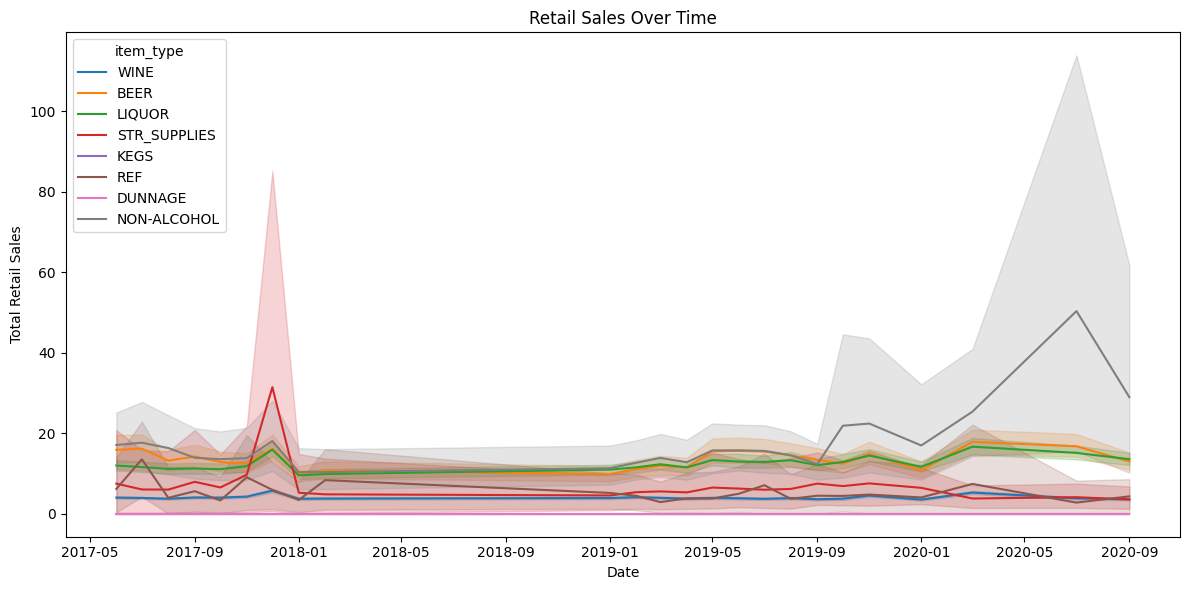

In [27]:
#Visualizing sales over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='retail_sales', hue='item_type')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Retail Sales')
plt.tight_layout()
plt.show()

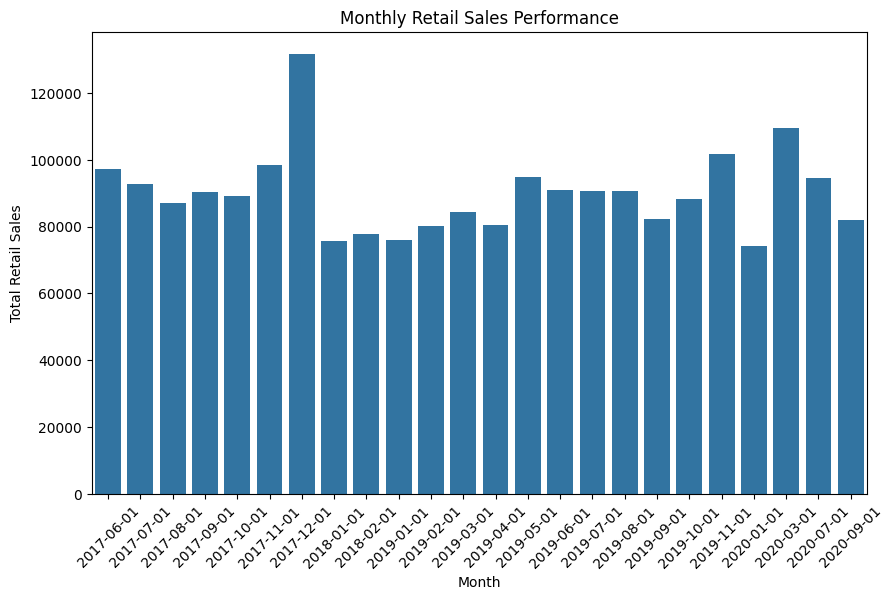

In [31]:
#Monthly Sales Performance(Sesonal Trends)
monthly_sales = df.groupby('date')['retail_sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_sales, x='date', y='retail_sales')
plt.title('Monthly Retail Sales Performance')
plt.xlabel('Month')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.show()

In [34]:
#Warehouse Sales
warehouse_sales_by_product = df.groupby('item_type')['warehouse_sales'].sum().reset_index().sort_values(by='warehouse_sales', ascending=False)

#Top Products
top_products_w = warehouse_sales_by_product.sort_values(by='warehouse_sales', ascending=False).head(10)
print(top_products)

      item_type  warehouse_sales
0          BEER       6527236.51
7          WINE       1156984.91
2          KEGS        118431.00
3        LIQUOR         94906.27
4   NON-ALCOHOL         26149.59
6  STR_SUPPLIES             0.00
5           REF        -20499.00
1       DUNNAGE       -121454.00


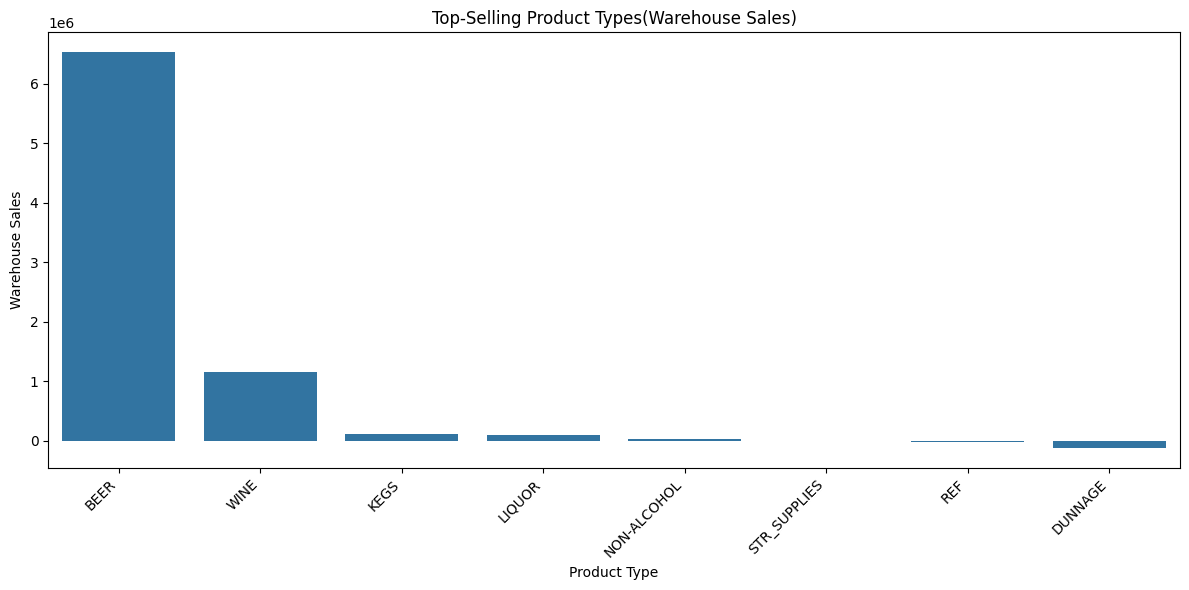

In [35]:
#Visualizing Top-Selling Products
plt.figure(figsize=(12,6))
sns.barplot(data=top_products_w, x='item_type', y='warehouse_sales')
plt.title('Top-Selling Product Types(Warehouse Sales)')
plt.xlabel('Product Type')
plt.ylabel('Warehouse Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()